The task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Dataset

In [2]:
df = pd.read_table('adult.txt',sep=',')
pd.set_option('display.max_columns', None)
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_Per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Check for Missing Values 

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Salary            0
dtype: int64

### Check for ' ?' 

In [7]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_Num        0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_Per_Week       0
Native_Country     583
Salary               0
dtype: int64

In [8]:
df.isin([' ?']).sum()/len(df)*100

Age               0.000000
Workclass         5.638647
Fnlwgt            0.000000
Education         0.000000
Education_Num     0.000000
Marital_Status    0.000000
Occupation        5.660146
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_Gain      0.000000
Capital_Loss      0.000000
Hours_Per_Week    0.000000
Native_Country    1.790486
Salary            0.000000
dtype: float64

## Remark
1. There is no NaN value in the Dataset
2. But there is some ' ?' values in the columns Workclass,Occupation,Native_Country

### Check for Duplicate Record

In [9]:
df.duplicated().sum()

24

## Remark
1. There is 24 duplicate records

## Univariate Analysis

### Plot the target column Salary

Text(0.5, 1.0, 'Salary')

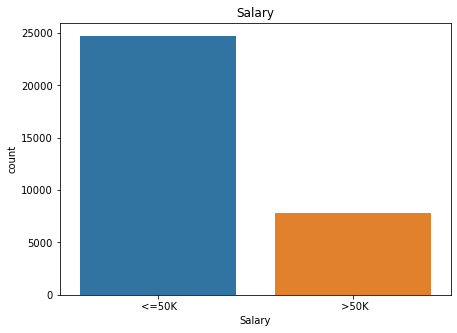

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(x='Salary',data=df)
plt.title("Salary")

In [11]:
df['Salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

In [12]:
## Parcentage of <=50k values

print((24720/(24720+7841))*100)
(7841/(24720+7841))*100

75.91904425539757


24.080955744602438

## Remark
1. It is an imbalanced dataset
2. Around 76% data is <=50k

### Categorical Variable

In [13]:
Categorical = [i for i in df.columns if df[i].dtypes == object]

In [14]:
#Summary of Categorial data

Categorical_summary = pd.DataFrame(columns=['columns', 'values', 'inc_na', 'exc_na', 'missval', '%_missval'])
temp = pd.DataFrame()

for i in Categorical:
    temp['columns'] = [i]
    temp['values'] = [df[i].unique()]
    temp['inc_na'] = len(df[i].unique())
    temp['exc_na'] = df[i].nunique()
    temp['missval'] = df[i].isnull().sum()
    temp['%_missval'] = (df[i].isnull().sum()/len(df))*100
    Categorical_summary = pd.concat([temp,Categorical_summary],ignore_index=True)
    
Categorical_summary

,columns,values,inc_na,exc_na,missval,%_missval
0,Salary,"[ <=50K, >50K]",2,2,0,0.0
1,Native_Country,"[ United-States, Cuba, Jamaica, India, ?, ...",42,42,0,0.0
2,Sex,"[ Male, Female]",2,2,0,0.0
3,Race,"[ White, Black, Asian-Pac-Islander, Amer-In...",5,5,0,0.0
4,Relationship,"[ Not-in-family, Husband, Wife, Own-child, ...",6,6,0,0.0
5,Occupation,"[ Adm-clerical, Exec-managerial, Handlers-cl...",15,15,0,0.0
6,Marital_Status,"[ Never-married, Married-civ-spouse, Divorce...",7,7,0,0.0
7,Education,"[ Bachelors, HS-grad, 11th, Masters, 9th, ...",16,16,0,0.0
8,Workclass,"[ State-gov, Self-emp-not-inc, Private, Fed...",9,9,0,0.0


In [15]:
Result = {}
for i in Categorical:
    j = i
    Result[j]=df[i].unique()
    
Result

{'Workclass': array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 'Education': array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
        ' Preschool', ' 12th'], dtype=object),
 'Marital_Status': array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed'], dtype=object),
 'Occupation': array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
 'Relationship': array([' Not-in

In [16]:
Categorical = [i for i in Categorical if i != 'Salary']

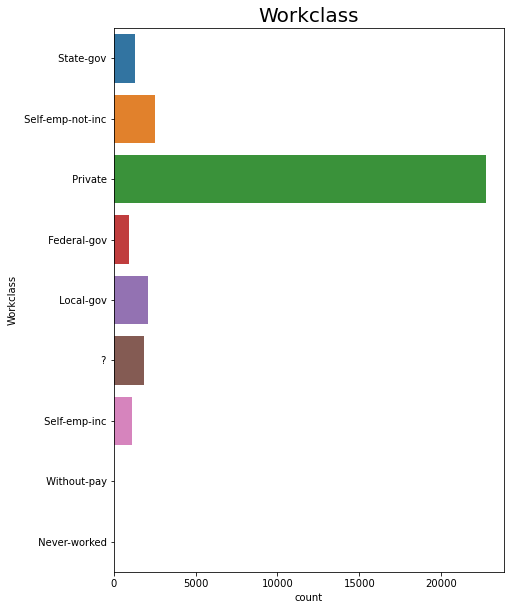

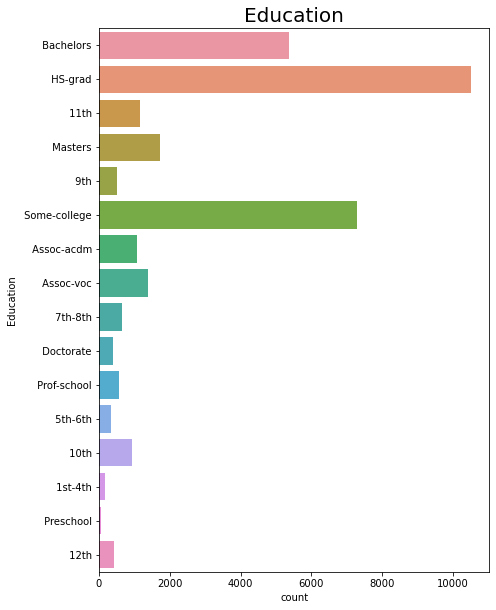

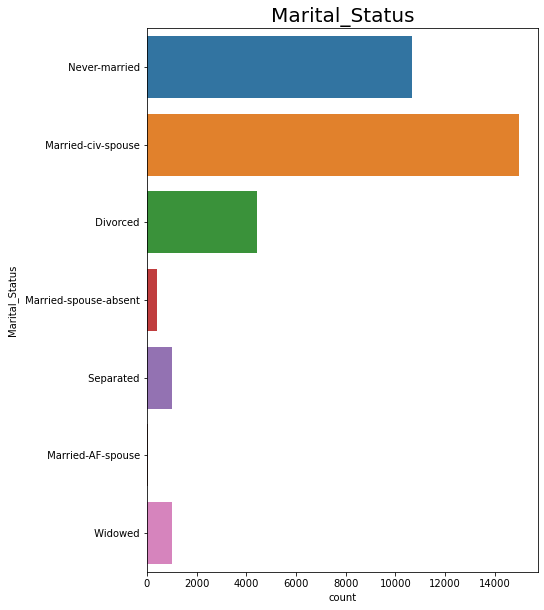

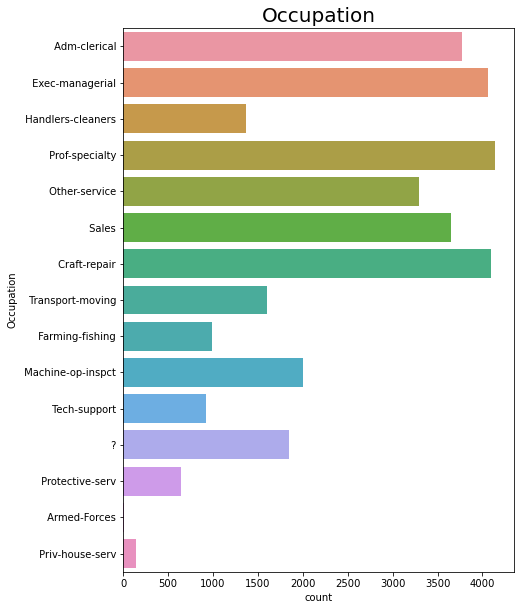

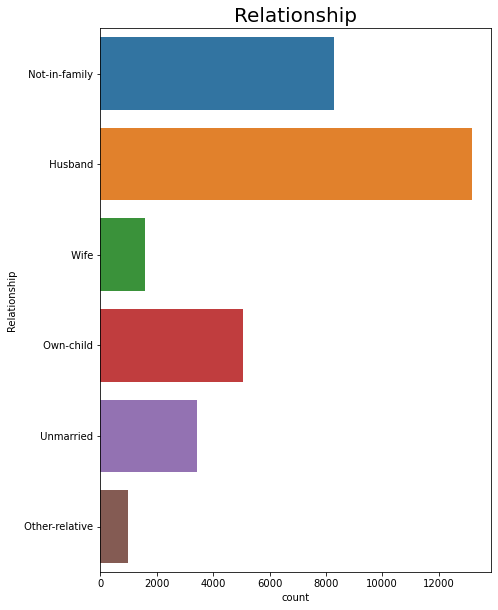

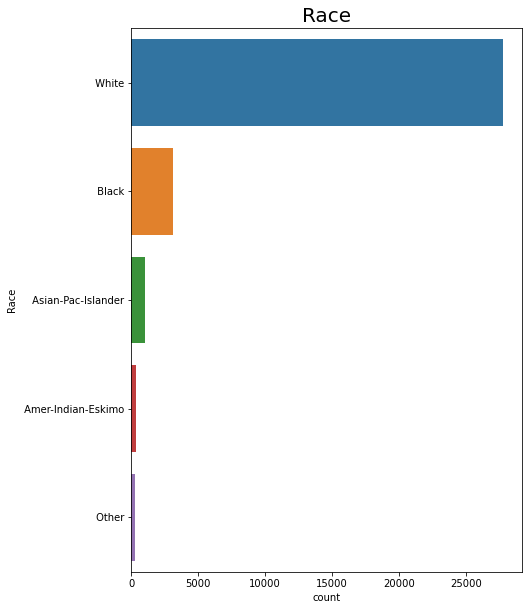

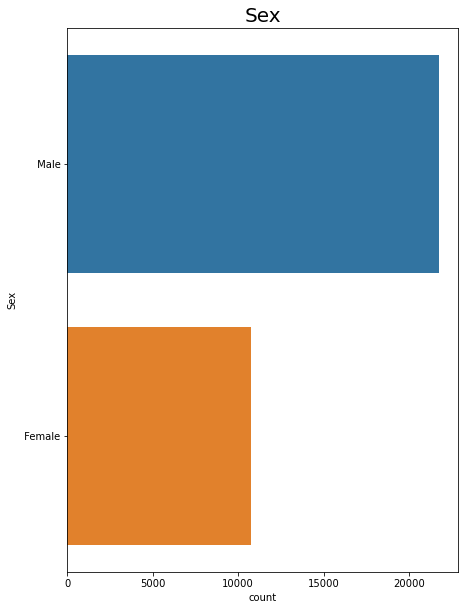

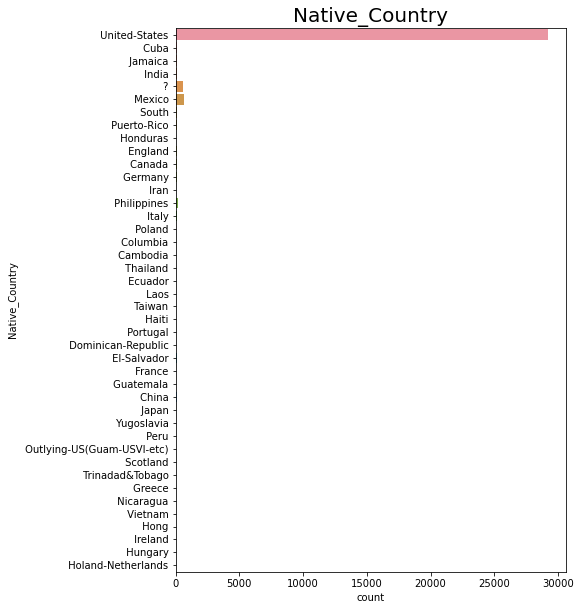

In [17]:
# Count plot of Categorical variable

for feature in Categorical:
    data = df.copy()
    plt.figure(figsize=(7,10))
    sns.countplot(y=data[feature])
    plt.title(feature, size=20)
    plt.show()
    

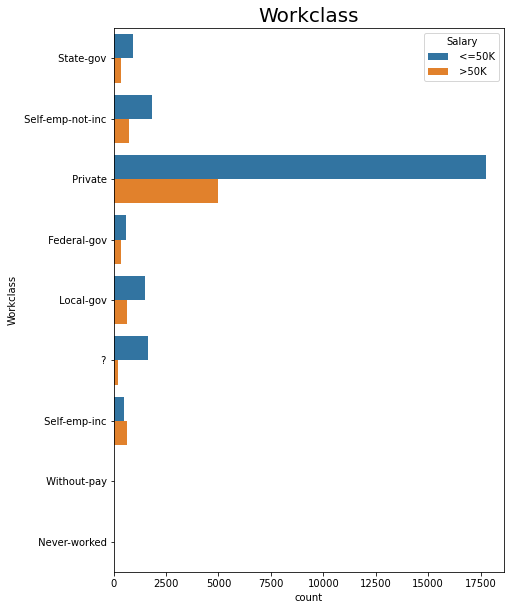

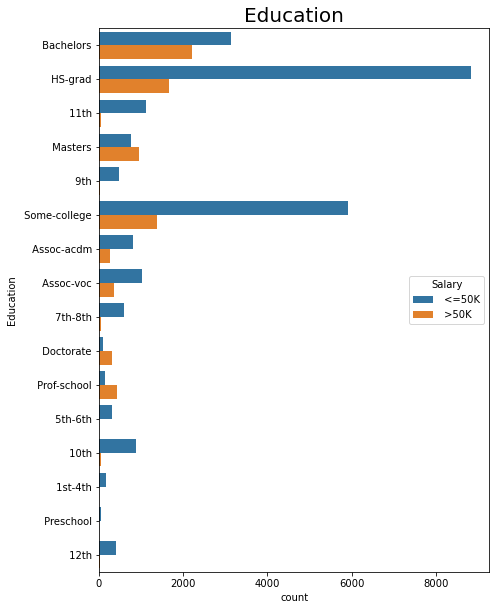

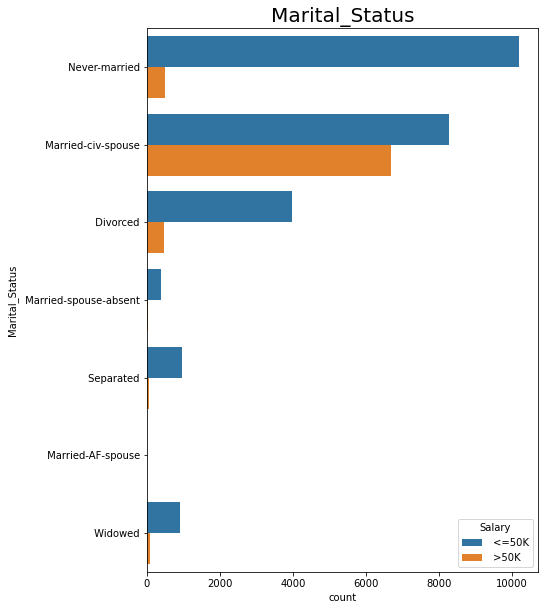

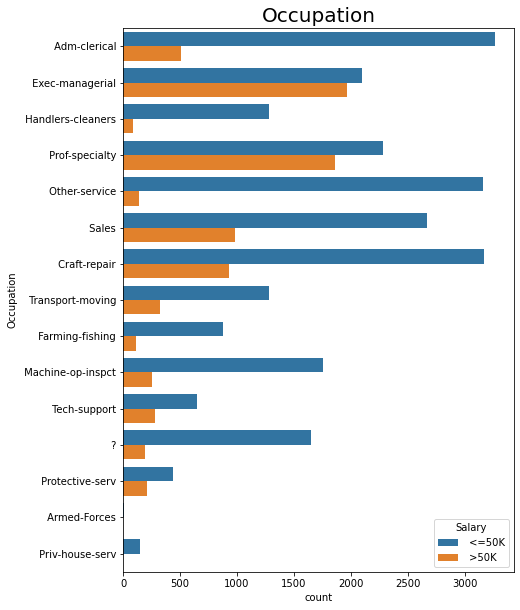

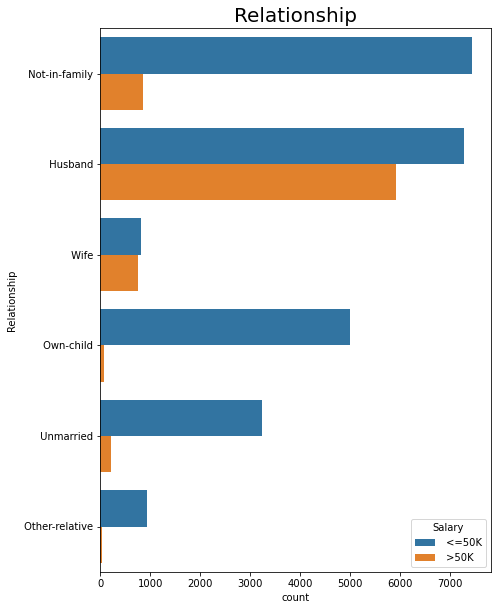

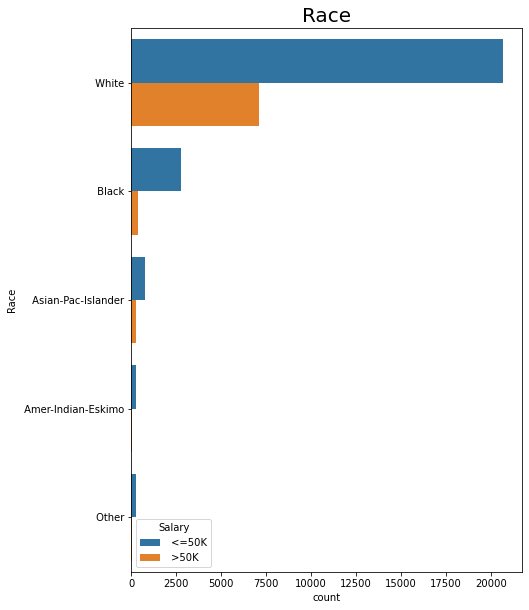

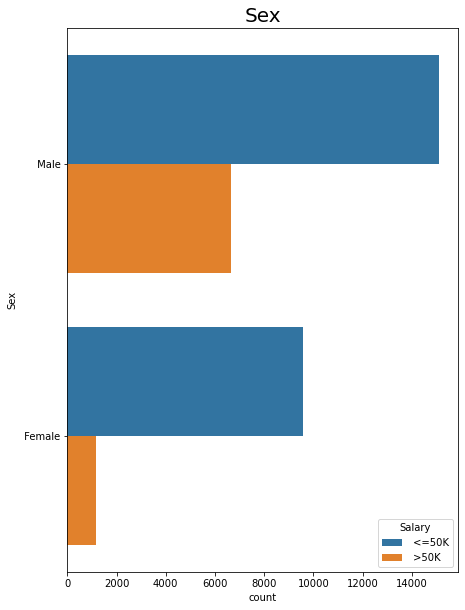

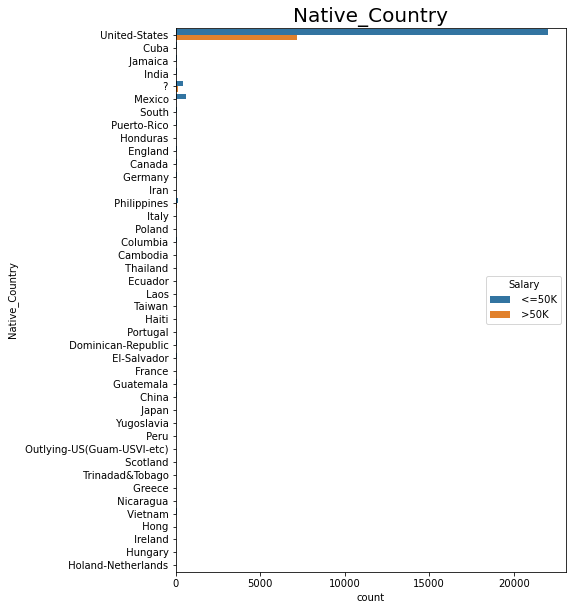

In [18]:
# Relationship Between Categorical Variable and Salary

for feature in Categorical:
    data = df.copy()
    plt.figure(figsize=(7,10))
    sns.countplot(y=data[feature],hue=data.Salary)
    plt.title(feature, size=20)
    plt.show()

In [19]:
for i in df['Workclass'].unique():
    print(f"{i} : {round(len(df[df['Workclass'] == i])/len(df)*100,2)} :::: {len(df[df['Workclass'] == i])}")

 State-gov : 3.99 :::: 1298
 Self-emp-not-inc : 7.8 :::: 2541
 Private : 69.7 :::: 22696
 Federal-gov : 2.95 :::: 960
 Local-gov : 6.43 :::: 2093
 ? : 5.64 :::: 1836
 Self-emp-inc : 3.43 :::: 1116
 Without-pay : 0.04 :::: 14
 Never-worked : 0.02 :::: 7


In [20]:
df['Education_Num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [21]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [22]:
for i in df['Race'].unique():
    print(f"{i} : {round(len(df[df['Race'] == i])/len(df)*100,2)}")

 White : 85.43
 Black : 9.59
 Asian-Pac-Islander : 3.19
 Amer-Indian-Eskimo : 0.96
 Other : 0.83


### Remark
1. As Education_Num and Education both are represent same data we drop the 'Education' column
2. Drop Relationship as we have Marital_Status
3. As Amer-Indian-Eskimo and Other are present less than 1% of the observation in the dataset then we can mearge them togethet as Others
4. Frequency Encoding on Native_Country as number of unique features in Native_Country  is 42

## Numerical Variable

In [23]:
Numerical = [i for i in df.columns if df[i].dtypes != object]

In [24]:
Numerical_summary = pd.DataFrame(columns=['columns','Min','Max','MissingVals','%_MissingVals','IQR','lower','upper','Outlier_upper','Outlier_lower'])
temp = pd.DataFrame()
for i in Numerical:
    temp['columns'] = [i]
    temp['Min'] = df[i].min()
    temp['Max'] = df[i].max()
    temp['MissingVals'] = df[i].isnull().sum()
    temp['%_MissingVals'] = df[i].isnull().sum()/len(df)*100
    temp['IQR'] = df[i].quantile(0.75) - df[i].quantile(0.25)
    temp['lower'] = df[i].quantile(0.25) - 1.5*temp['IQR']
    temp['upper'] = df[i].quantile(0.75) + 1.5*temp['IQR']
    temp['Outlier_upper'] = len(df.loc[df[i]>float(temp['upper'])])
    temp['Outlier_lower'] = len(df.loc[df[i]<float(temp['lower'])])
    Numerical_summary = pd.concat([temp,Numerical_summary],ignore_index=True)
    
Numerical_summary

,columns,Min,Max,MissingVals,%_MissingVals,IQR,lower,upper,Outlier_upper,Outlier_lower
0,Hours_Per_Week,1,99,0,0.0,5.0,32.5,52.5,3492,5516
1,Capital_Loss,0,4356,0,0.0,0.0,0.0,0.0,1519,0
2,Capital_Gain,0,99999,0,0.0,0.0,0.0,0.0,2712,0
3,Education_Num,1,16,0,0.0,3.0,4.5,16.5,0,1198
4,Fnlwgt,12285,1484705,0,0.0,119224.0,-61009.0,415887.0,992,0
5,Age,17,90,0,0.0,20.0,-2.0,78.0,143,0


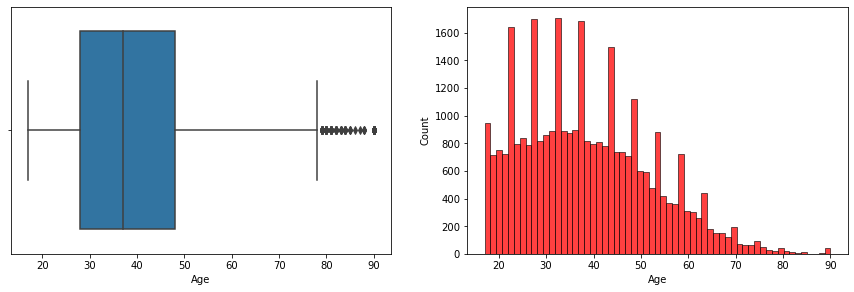

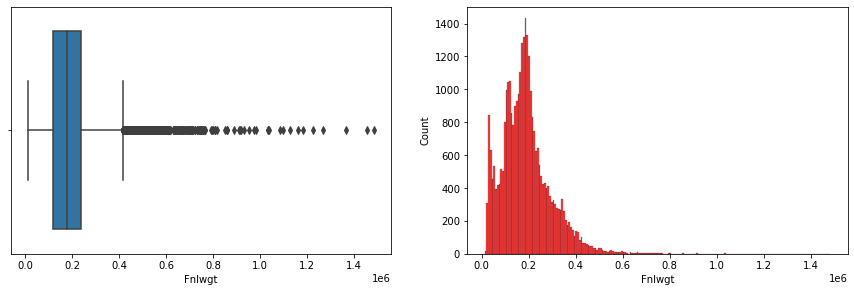

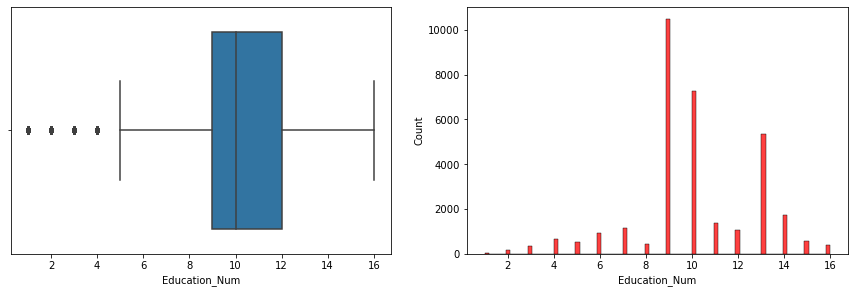

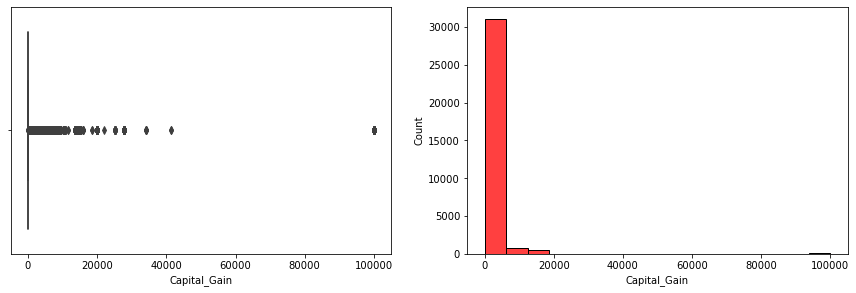

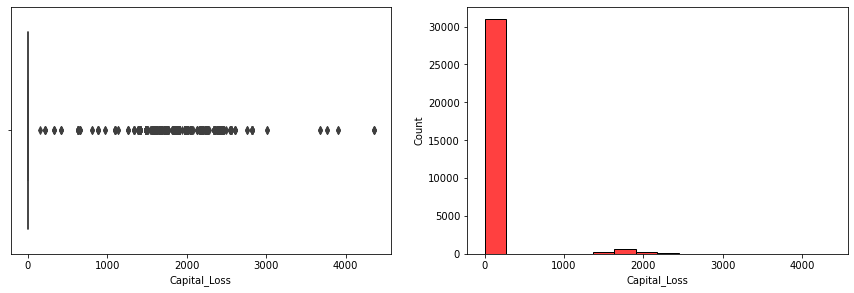

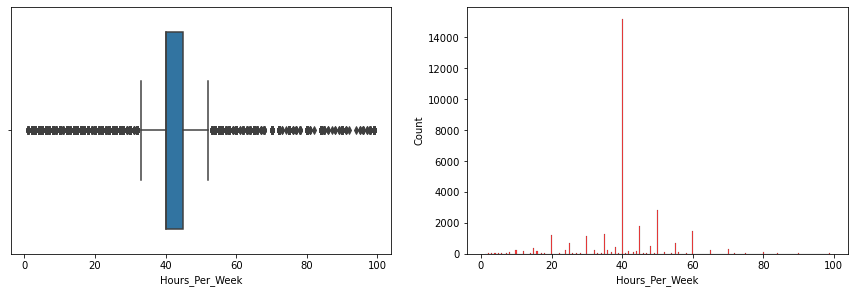

<Figure size 1080x720 with 0 Axes>

In [25]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(Numerical):
    if ix <= 2:
        ax1 = fig.add_subplot(2,2,1)
        sns.boxplot(data = df, x=c, ax = ax1)
        ax2 = fig.add_subplot(2,2,2)
        sns.histplot(data = df, x=c, ax = ax2,color="red")
    ix = 3
    if ix == 3: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [26]:
for i in df['Capital_Loss'].unique():
    print(f"{i} : {round(len(df[df['Capital_Loss'] == i])/len(df)*100,2)}")

0 : 95.33
2042 : 0.03
1408 : 0.06
1902 : 0.62
1573 : 0.02
1887 : 0.49
1719 : 0.07
1762 : 0.04
1564 : 0.08
2179 : 0.05
1816 : 0.01
1980 : 0.07
1977 : 0.52
1876 : 0.12
1340 : 0.02
2206 : 0.02
1741 : 0.07
1485 : 0.16
2339 : 0.05
2415 : 0.15
1380 : 0.02
1721 : 0.06
2051 : 0.06
2377 : 0.06
1669 : 0.07
2352 : 0.01
1672 : 0.1
653 : 0.01
2392 : 0.03
1504 : 0.06
2001 : 0.07
1590 : 0.12
1651 : 0.03
1628 : 0.05
1848 : 0.16
1740 : 0.13
2002 : 0.06
1579 : 0.06
2258 : 0.08
1602 : 0.14
419 : 0.01
2547 : 0.01
2174 : 0.02
2205 : 0.03
1726 : 0.01
2444 : 0.04
1138 : 0.01
2238 : 0.01
625 : 0.04
213 : 0.01
1539 : 0.0
880 : 0.02
1668 : 0.01
1092 : 0.02
1594 : 0.02
3004 : 0.01
2231 : 0.01
1844 : 0.0
810 : 0.01
2824 : 0.03
2559 : 0.04
2057 : 0.02
1974 : 0.06
974 : 0.01
2149 : 0.01
1825 : 0.01
1735 : 0.01
1258 : 0.01
2129 : 0.01
2603 : 0.02
2282 : 0.0
323 : 0.01
4356 : 0.01
2246 : 0.02
1617 : 0.03
1648 : 0.01
2489 : 0.0
3770 : 0.01
1755 : 0.01
3683 : 0.01
2267 : 0.01
2080 : 0.0
2457 : 0.01
155 : 0.0
3900 : 0.0

In [27]:
for i in df['Capital_Gain'].unique():
    print(f"{i} : {round(len(df[df['Capital_Gain'] == i])/len(df)*100,2)}")

2174 : 0.15
0 : 91.67
14084 : 0.13
5178 : 0.3
5013 : 0.21
2407 : 0.06
14344 : 0.08
15024 : 1.07
7688 : 0.87
34095 : 0.02
4064 : 0.13
4386 : 0.21
7298 : 0.76
1409 : 0.02
3674 : 0.04
1055 : 0.08
3464 : 0.07
2050 : 0.02
2176 : 0.07
594 : 0.1
20051 : 0.11
6849 : 0.08
4101 : 0.06
1111 : 0.0
8614 : 0.17
3411 : 0.07
2597 : 0.06
25236 : 0.03
4650 : 0.13
9386 : 0.07
2463 : 0.03
3103 : 0.3
10605 : 0.04
2964 : 0.03
3325 : 0.16
2580 : 0.04
3471 : 0.02
4865 : 0.05
99999 : 0.49
6514 : 0.02
1471 : 0.02
2329 : 0.02
2105 : 0.03
2885 : 0.07
25124 : 0.01
10520 : 0.13
2202 : 0.05
2961 : 0.01
27828 : 0.1
6767 : 0.02
2228 : 0.02
1506 : 0.05
13550 : 0.08
2635 : 0.03
5556 : 0.02
4787 : 0.07
3781 : 0.04
3137 : 0.11
3818 : 0.02
3942 : 0.04
914 : 0.02
401 : 0.01
2829 : 0.1
2977 : 0.02
4934 : 0.02
2062 : 0.01
2354 : 0.03
5455 : 0.03
15020 : 0.02
1424 : 0.01
3273 : 0.02
22040 : 0.0
4416 : 0.04
3908 : 0.1
10566 : 0.02
991 : 0.02
4931 : 0.0
1086 : 0.01
7430 : 0.03
6497 : 0.03
114 : 0.02
7896 : 0.01
2346 : 0.02
3418 

### Remarks
1. Age and Fnlwgt have positivly Skew Distribution & Outliers
2. Drop Capital_Loss(95%) and Capital_Gain(91%) as more then 90% of the total dataset is 0
3. 

# ----------------------------------------------------------------------------------------------------------------

In [28]:
df1 = df.copy()

## Missing Value Imputation

### Replace ' ?' with ' Missing'

In [29]:
for feature in df.columns:
    df1[feature].replace(' ?',' Missing',inplace = True)

In [30]:
df1.isin([' ?']).sum()/len(df)*100

Age               0.0
Workclass         0.0
Fnlwgt            0.0
Education         0.0
Education_Num     0.0
Marital_Status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Capital_Gain      0.0
Capital_Loss      0.0
Hours_Per_Week    0.0
Native_Country    0.0
Salary            0.0
dtype: float64

## Remove Duplicate Records 

In [31]:
df1=df1.drop_duplicates()

df1.shape

(32537, 15)

## Feature Engineering on Categorical Variables

### Drop Education and Relationship

In [32]:
## Drop Education and Relationship columns

df1.drop(labels = ['Education','Relationship'],axis = 1,inplace = True)

###  Marital_Status
1. (" Married-civ-spouse"," Married-spouse-absent"," Married-AF-spouse") With "Married"

In [33]:
df1['Marital_Status'].replace((" Married-civ-spouse"," Married-spouse-absent"," Married-AF-spouse"),"Married",inplace=True)
df1['Marital_Status'].unique()

array([' Never-married', 'Married', ' Divorced', ' Separated', ' Widowed'],
      dtype=object)

###  Race

1. (Amer-Indian-Eskimo , Other) with Other

In [34]:
df1['Race'].replace(" Amer-Indian-Eskimo"," Other",inplace=True)
df1['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Other'], dtype=object)

### Frequency Encoding on Native_Country

In [35]:
## Creating a dictionary that contain the frequencies and the name of the category
Country_frequency_map = df1.Native_Country.value_counts().to_dict()

## Replace the categorical variable with the Frequency Encoding
df1.Native_Country = df1.Native_Country.map(Country_frequency_map)

df1['Native_Country'].nunique()

37

## Feature Engineering on Numerical Variables

### Normalization

In [36]:
df1.Fnlwgt = np.log1p(df1.Fnlwgt)

### Drop Capital_Loss Capital_Gain

In [37]:
df1.drop(labels=['Capital_Loss','Capital_Gain'],axis = 1,inplace = True)

### Outlier Imputation on Fnlwgt

In [38]:
IQR = df1['Fnlwgt'].quantile(0.75) - df1['Fnlwgt'].quantile(0.25)
upper = df1['Fnlwgt'].quantile(0.75) + 1.5*IQR
lower = df1['Fnlwgt'].quantile(0.25) - 1.5*IQR

df1.loc[df1['Fnlwgt'] > upper, ['Fnlwgt']] = upper
df1.loc[df1['Fnlwgt'] < lower, ['Fnlwgt']] = lower

In [39]:
Numerical = [i for i in df1.columns if df1[i].dtypes != object and i != 'Native_Country']

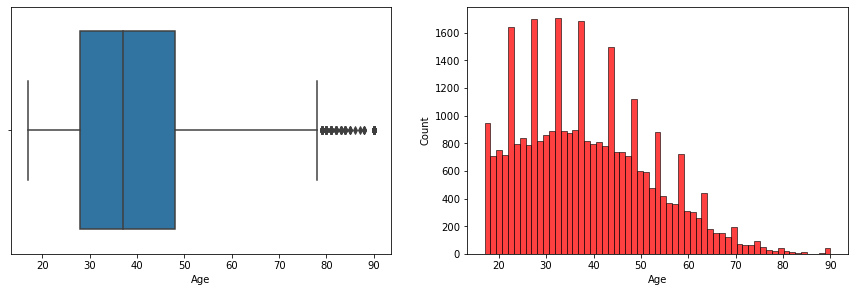

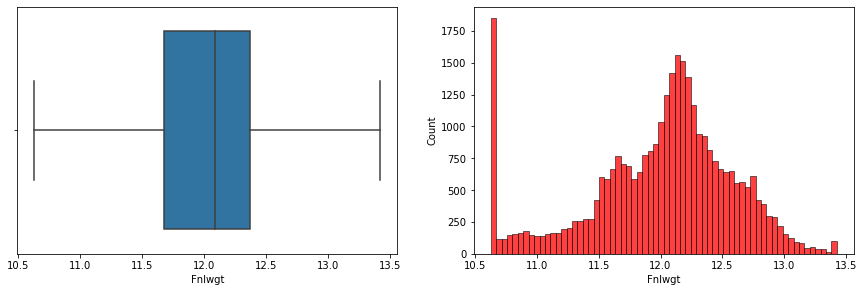

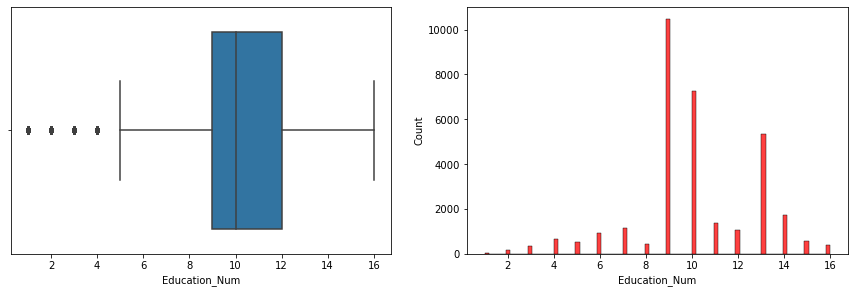

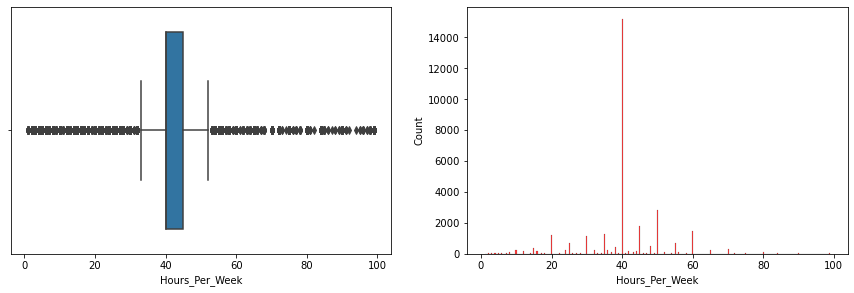

<Figure size 1080x720 with 0 Axes>

In [40]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(Numerical):
    if ix <= 2:
        ax1 = fig.add_subplot(2,2,1)
        sns.boxplot(data = df1, x=c, ax = ax1)
        ax2 = fig.add_subplot(2,2,2)
        sns.histplot(data = df1, x=c, ax = ax2,color="red")
    ix = 3
    if ix == 3: 
        fig = plt.figure(figsize = (15,10))
        ix =1

## One Hot Encoding

In [41]:
df1.head()

,Age,Workclass,Fnlwgt,Education_Num,Marital_Status,Occupation,Race,Sex,Hours_Per_Week,Native_Country,Salary
0,39,State-gov,11.258253,13,Never-married,Adm-clerical,White,Male,40,29153,<=50K
1,50,Self-emp-not-inc,11.330348,13,Married,Exec-managerial,White,Male,13,29153,<=50K
2,38,Private,12.281398,9,Divorced,Handlers-cleaners,White,Male,40,29153,<=50K
3,53,Private,12.366157,7,Married,Handlers-cleaners,Black,Male,40,29153,<=50K
4,28,Private,12.732013,13,Married,Prof-specialty,Black,Female,40,95,<=50K


In [42]:
df1 = pd.get_dummies(data = df1,columns=['Workclass','Marital_Status','Occupation','Race','Sex','Salary'],drop_first=True)
df1.head(10)

,Age,Fnlwgt,Education_Num,Hours_Per_Week,Native_Country,Workclass_ Local-gov,Workclass_ Missing,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital_Status_ Never-married,Marital_Status_ Separated,Marital_Status_ Widowed,Marital_Status_Married,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Missing,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Salary_ >50K
0,39,11.258253,13,40,29153,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,50,11.330348,13,13,29153,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,38,12.281398,9,40,29153,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,53,12.366157,7,40,29153,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,12.732013,13,40,95,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
5,37,12.558780,14,40,29153,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,49,11.984103,5,16,81,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7,52,12.253161,9,45,29153,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
8,31,10.731646,14,50,29153,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
9,42,11.979486,13,40,29153,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [46]:
df1.to_csv('PreprocessedData.csv', index=False)